In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
from PIL import Image

In [2]:
images_df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv")
styles_df = pd.read_csv("/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')

In [3]:
images_df['id'] = images_df['filename'].apply(lambda x: x.replace(".jpg", "")).astype(int)
images_df

,filename,link,id
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,15970
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...,39386
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,59263
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,21379
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,53759
...,...,...,...
44441,17036.jpg,http://assets.myntassets.com/v1/images/style/p...,17036
44442,6461.jpg,http://assets.myntassets.com/v1/images/style/p...,6461
44443,18842.jpg,http://assets.myntassets.com/v1/images/style/p...,18842
44444,46694.jpg,http://assets.myntassets.com/v1/images/style/p...,46694


In [4]:
data = styles_df.merge(images_df, on='id', how='left').reset_index(drop=True)
data['filename'] = data['filename'].apply(lambda x: os.path.join("/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/", x))
image_files = os.listdir("/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/")
data['file_found'] = data['id'].apply(lambda x: f"{x}.jpg" in image_files)
data = data[data['file_found']].reset_index(drop=True)

In [5]:
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,file_found
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,True
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,True
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,True
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,True
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,True


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44419 entries, 0 to 44418
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44419 non-null  int64  
 1   gender              44419 non-null  object 
 2   masterCategory      44419 non-null  object 
 3   subCategory         44419 non-null  object 
 4   articleType         44419 non-null  object 
 5   baseColour          44404 non-null  object 
 6   season              44398 non-null  object 
 7   year                44418 non-null  float64
 8   usage               44102 non-null  object 
 9   productDisplayName  44412 non-null  object 
 10  filename            44419 non-null  object 
 11  link                44419 non-null  object 
 12  file_found          44419 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 4.1+ MB


In [7]:
data.describe(include='all')

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,file_found
count,44419.000000,44419,44419,44419,44419,44404,44398,44418.000000,44102,44412,44419,44419,44419
unique,NaN,5,7,45,142,46,4,NaN,8,31116,44419,44417,1
top,NaN,Men,Apparel,Topwear,Tshirts,Black,Summer,NaN,Casual,Lucera Women Silver Earrings,/kaggle/input/fashion-product-images-dataset/f...,http://assets.myntassets.com/v1/images/style/p...,True
freq,NaN,22142,21392,15398,7066,9727,21470,NaN,34401,82,1,2,44419
mean,29695.850177,NaN,NaN,NaN,NaN,NaN,NaN,2012.806430,NaN,NaN,NaN,NaN,NaN
std,17050.002202,NaN,NaN,NaN,NaN,NaN,NaN,2.126489,NaN,NaN,NaN,NaN,NaN
min,1163.000000,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN,NaN
25%,14768.500000,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN
50%,28617.000000,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN
75%,44685.000000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
data.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
filename                0
link                    0
file_found              0
dtype: int64

In [9]:
data['baseColour'].fillna('Unknown', inplace=True)
data.dropna(subset=['season', 'usage', 'productDisplayName'], inplace=True)

/tmp/ipykernel_35/1676532910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['baseColour'].fillna('Unknown', inplace=True)


In [10]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [11]:
data['year'] = data['year'].astype(int)

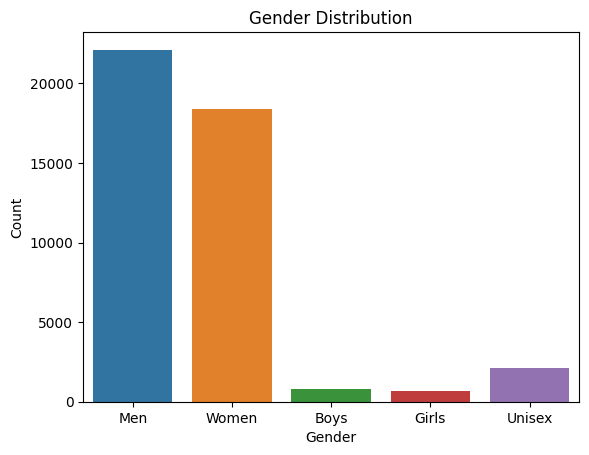

In [12]:
sns.countplot(x='gender',data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

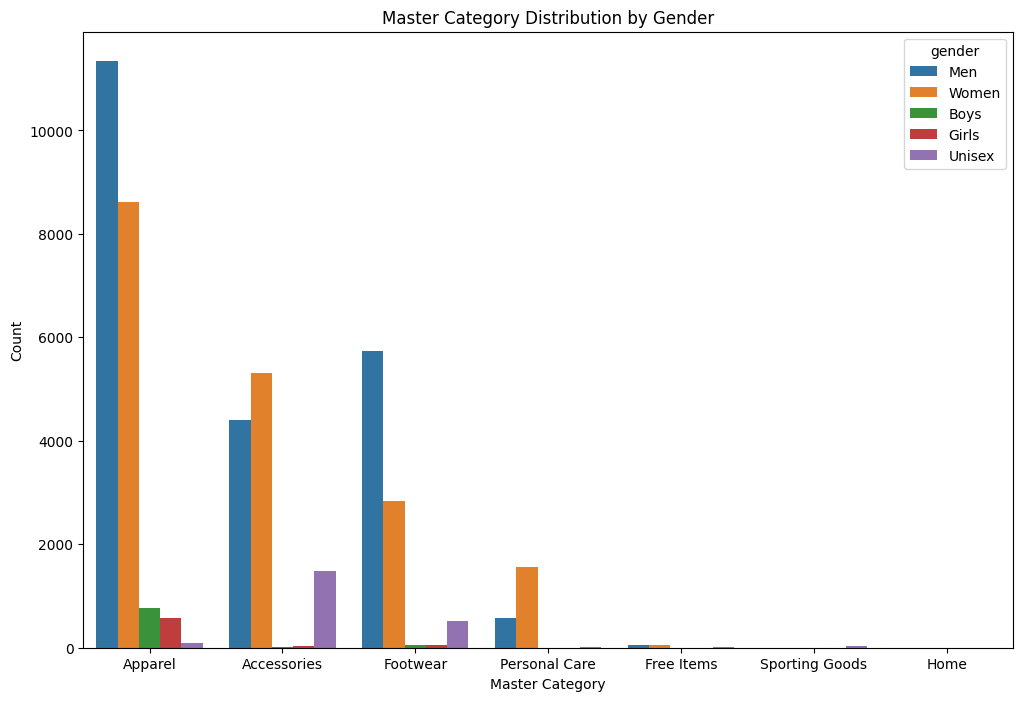

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x='masterCategory', hue='gender', data=data)
plt.title('Master Category Distribution by Gender')
plt.xlabel('Master Category')
plt.ylabel('Count')
plt.show()

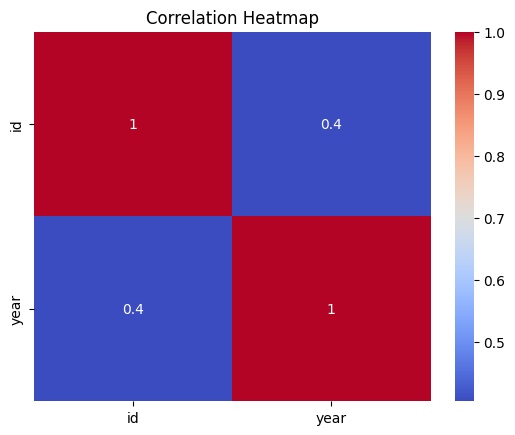

In [14]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

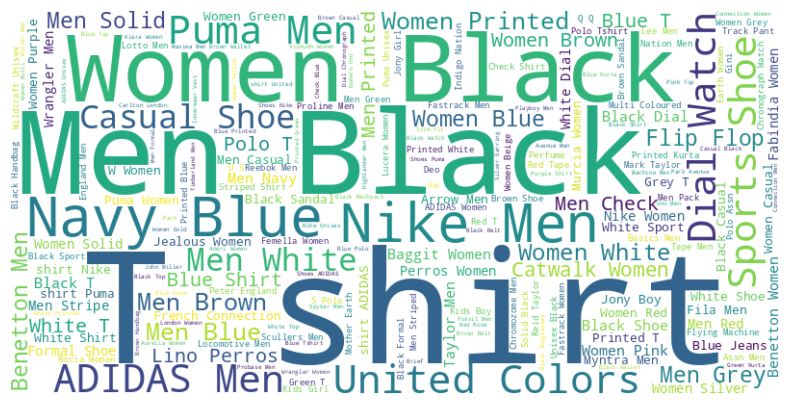

In [15]:
text = ' '.join(data['productDisplayName'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


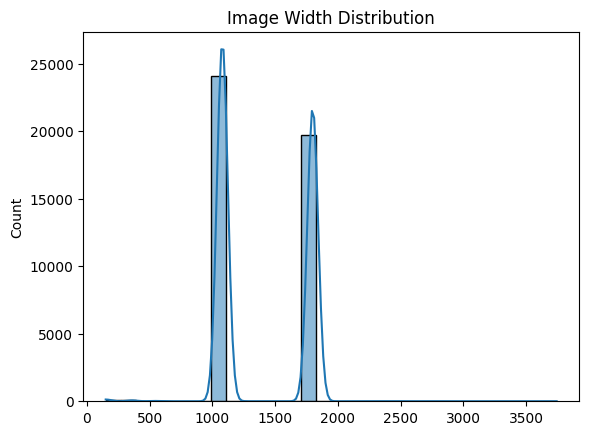

In [16]:
image_sizes = [Image.open(filename).size for filename in data['filename']]
image_widths, image_heights = zip(*image_sizes)
sns.histplot(image_widths, bins=30, kde=True)
plt.title('Image Width Distribution')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


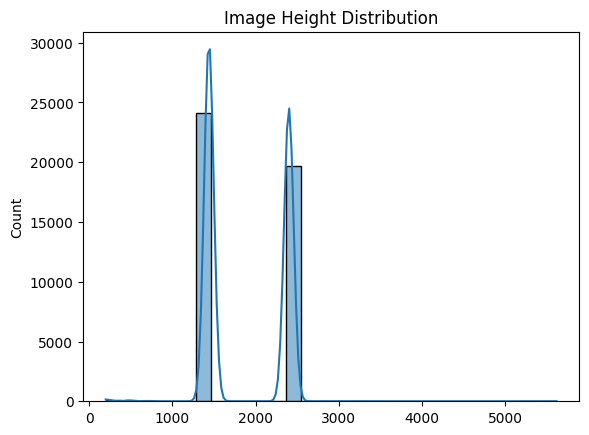

In [17]:
sns.histplot(image_heights, bins=30, kde=True)
plt.title('Image Height Distribution')
plt.show()

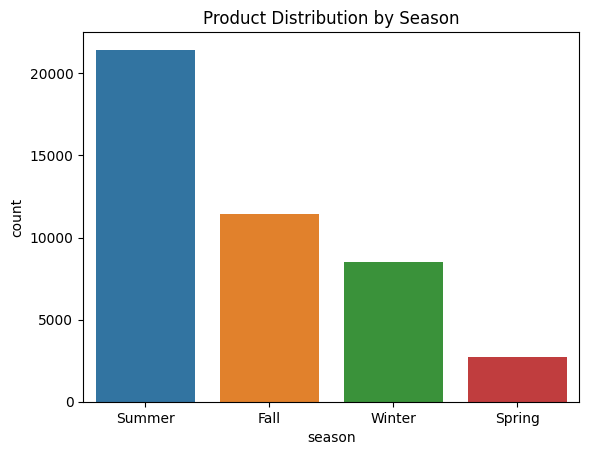

In [18]:
sns.countplot(x='season', data=data, order=data['season'].value_counts().index)
plt.title('Product Distribution by Season')
plt.show()

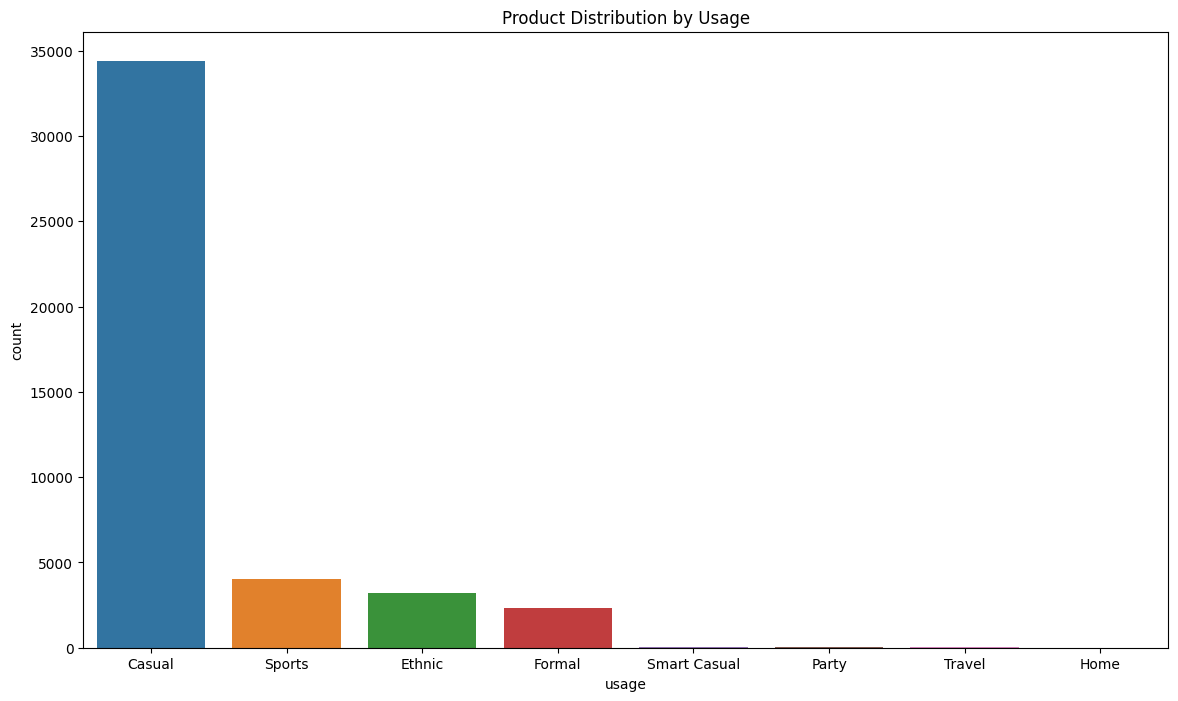

In [19]:
plt.figure(figsize=(14,8))
sns.countplot(x='usage', data=data, order=data['usage'].value_counts().index)
plt.title('Product Distribution by Usage')
plt.show()

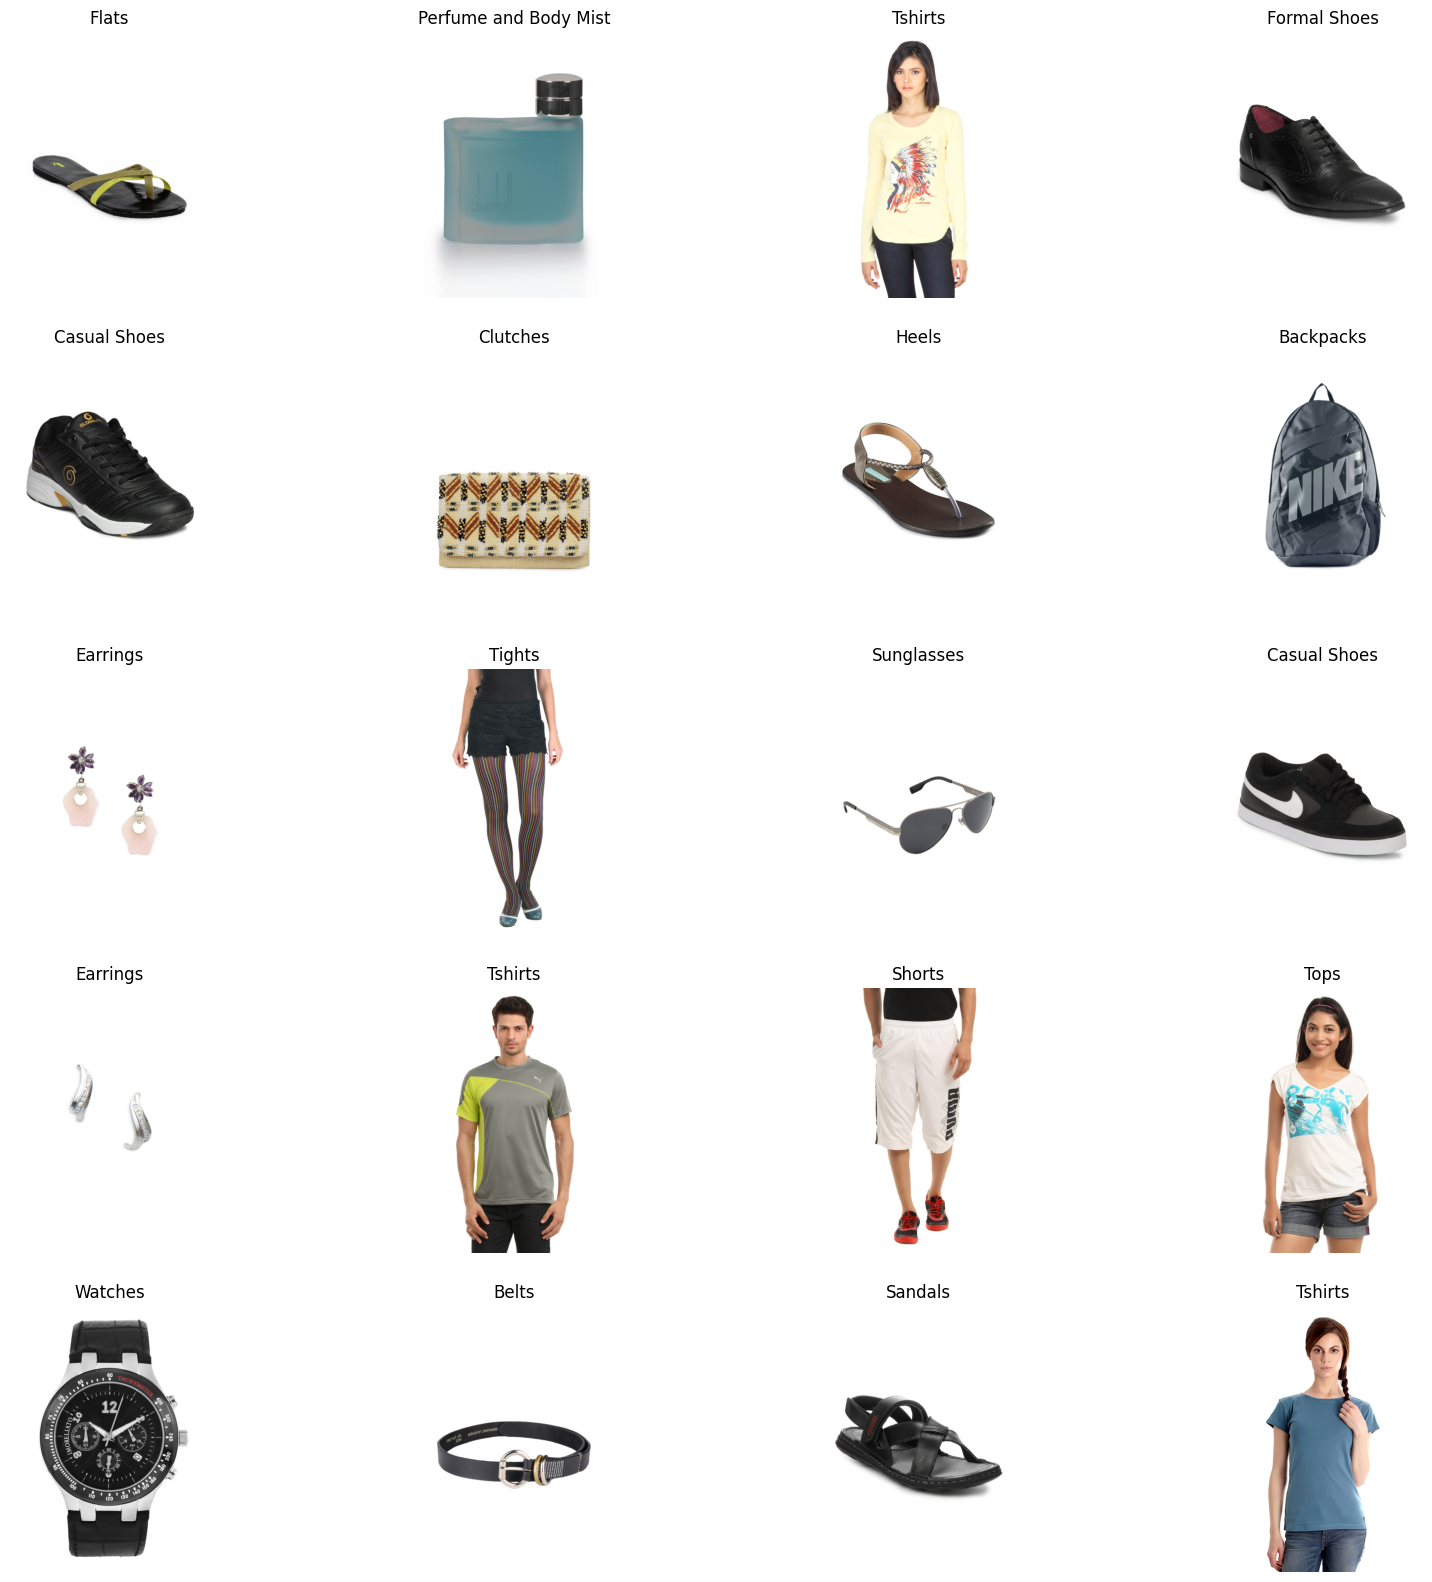

In [22]:
def show_images(df, num_images=20, images_per_row=4):
    rows = num_images // images_per_row
    plt.figure(figsize=(20, 20))
    sample = df.sample(num_images)
    for i, row in enumerate(sample.iterrows()):
        index, row = row
        img = Image.open(row['filename'])
        plt.subplot(rows, images_per_row, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{row['articleType']}")

show_images(data, num_images=20, images_per_row=4)


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
label_encoders = {}
for column in ['baseColour', 'articleType', 'season', 'gender']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

In [25]:
train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)

In [26]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image = image / 255.0  # Normalize to [0, 1]
    return image

In [27]:
def create_dataset(df, batch_size=32):
    image_paths = df['filename'].values
    labels = {
        'color_output': df['baseColour'].values,
        'type_output': df['articleType'].values,
        'season_output': df['season'].values,
        'gender_output': df['gender'].values
    }
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(lambda x, y: (load_and_preprocess_image(x), y),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=len(df))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [28]:
train_dataset = create_dataset(train_df)
val_dataset = create_dataset(val_df)

In [29]:
input_layer = Input(shape=(128, 128, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)

x = Flatten()(x)

In [30]:
color_output = Dense(len(label_encoders['baseColour'].classes_), activation='softmax', name='color_output')(x)
type_output = Dense(len(label_encoders['articleType'].classes_), activation='softmax', name='type_output')(x)
season_output = Dense(len(label_encoders['season'].classes_), activation='softmax', name='season_output')(x)
gender_output = Dense(len(label_encoders['gender'].classes_), activation='softmax', name='gender_output')(x)

In [31]:
model = Model(inputs=input_layer, outputs=[color_output, type_output, season_output, gender_output])
model.compile(optimizer='adam', 
              loss={'color_output': 'sparse_categorical_crossentropy', 
                    'type_output': 'sparse_categorical_crossentropy', 
                    'season_output': 'sparse_categorical_crossentropy', 
                    'gender_output': 'sparse_categorical_crossentropy'},
              metrics={'color_output': 'accuracy', 
                       'type_output': 'accuracy', 
                       'season_output': 'accuracy', 
                       'gender_output': 'accuracy'})
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 64, 64,    │        128 │ max_pooling2d[0]… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │     18,496 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        512 │ max_pooling2d_2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 32768)     │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color_output        │ (None, 47)        │  1,540,143 │ flatten[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ type_output (Dense) │ (None, 141)       │  4,620,429 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ season_output       │ (None, 4)         │    131,076 │ flatten[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_output       │ (None, 5)         │    163,845 │ flatten[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,549,637 (24.98 MB)

 Trainable params: 6,549,189 (24.98 MB)

 Non-trainable params: 448 (1.75 KB)

In [32]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,batch_size = 32,
    epochs=10
)

Epoch 1/10
   5/1102 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - color_output_accuracy: 0.1136 - gender_output_accuracy: 0.3625 - loss: 21.8886 - season_output_accuracy: 0.2544 - type_output_accuracy: 0.1106            

I0000 00:00:1719989176.116745     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719989176.147595     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1102/1102 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - color_output_accuracy: 0.3975 - gender_output_accuracy: 0.7543 - loss: 12.7447 - season_output_accuracy: 0.5601 - type_output_accuracy: 0.5986

W0000 00:00:1719989242.925920     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719989304.845609     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1102/1102 ━━━━━━━━━━━━━━━━━━━━ 402s 120ms/step - color_output_accuracy: 0.3976 - gender_output_accuracy: 0.7543 - loss: 12.7412 - season_output_accuracy: 0.5601 - type_output_accuracy: 0.5987 - val_color_output_accuracy: 0.4779 - val_gender_output_accuracy: 0.8152 - val_loss: 4.6498 - val_season_output_accuracy: 0.6278 - val_type_output_accuracy: 0.7282
Epoch 2/10


W0000 00:00:1719989308.356434     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1102/1102 ━━━━━━━━━━━━━━━━━━━━ 314s 78ms/step - color_output_accuracy: 0.6570 - gender_output_accuracy: 0.8855 - loss: 2.6330 - season_output_accuracy: 0.7286 - type_output_accuracy: 0.8656 - val_color_output_accuracy: 0.5473 - val_gender_output_accuracy: 0.8574 - val_loss: 3.6271 - val_season_output_accuracy: 0.6785 - val_type_output_accuracy: 0.7891
Epoch 3/10
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 319s 71ms/step - color_output_accuracy: 0.7609 - gender_output_accuracy: 0.9222 - loss: 1.7428 - season_output_accuracy: 0.7753 - type_output_accuracy: 0.9347 - val_color_output_accuracy: 0.5164 - val_gender_output_accuracy: 0.8586 - val_loss: 4.1086 - val_season_output_accuracy: 0.5977 - val_type_output_accuracy: 0.7926
Epoch 4/10
1102/1102 ━━━━━━━━━━━━━━━━━━━━ 329s 80ms/step - color_output_accuracy: 0.8214 - gender_output_accuracy: 0.9383 - loss: 1.3679 - season_output_accuracy: 0.8030 - type_output_accuracy: 0.9601 - val_color_output_accuracy: 0.5603 - val_gender_output_accuracy: 0.8646 - val_l

In [33]:
model.save("assessment.keras")

In [34]:
model.evaluate(val_dataset)

276/276 ━━━━━━━━━━━━━━━━━━━━ 55s 7ms/step - color_output_accuracy: 0.5708 - gender_output_accuracy: 0.8615 - loss: 4.8692 - season_output_accuracy: 0.7075 - type_output_accuracy: 0.8175


[4.903006553649902,
 0.5766787528991699,
 0.8645644187927246,
 0.6970281600952148,
 0.816583514213562]

In [2]:
import cv2
test_images = '/kaggle/input/test-samples'

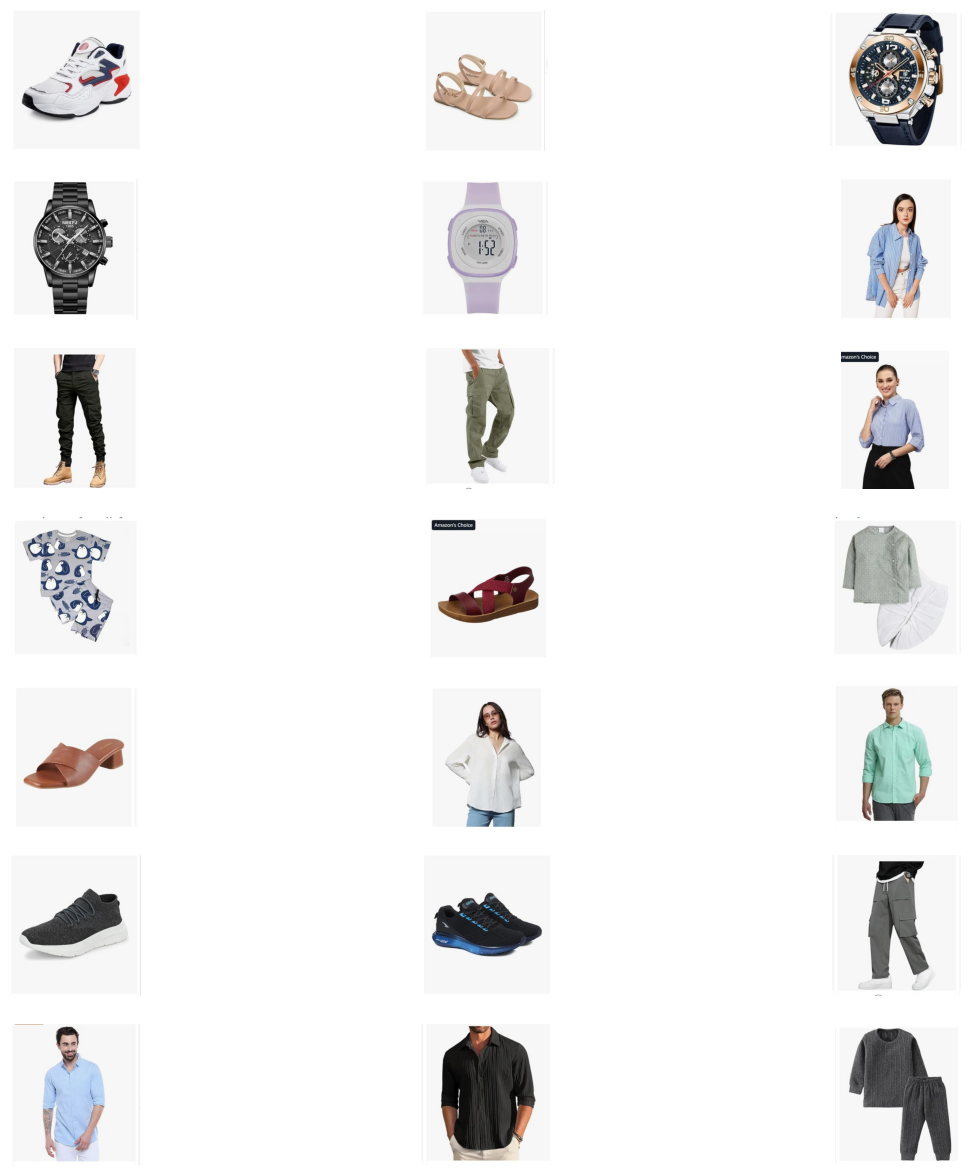

In [17]:
file_list = os.listdir(test_images)
num_rows = (len(file_list) + 2) // 3  
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, file in enumerate(file_list):
    img_path = os.path.join(test_images, file)
    img = cv2.imread(img_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(img)
    axes[row, col].axis('off')  
plt.show()
